In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/Train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/Test'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Colab Notebooks/Dataset/Train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3786 images belonging to 13 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 579 images belonging to 13 classes.


In [15]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-15-2d02736eff38>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
119/119 [==============================] - 2115s 18s/step - loss: 3.6547 - accuracy: 0.4255 - val_loss: 3.4872 - val_accuracy: 0.1865
Epoch 2/20
119/119 [==============================] - 504s 4s/step - loss: 2.0243 - accuracy: 0.5222 - val_loss: 4.3416 - val_accuracy: 0.2055
Epoch 3/20
119/119 [==============================] - 496s 4s/step - loss: 1.9508 - accuracy: 0.5449 - val_loss: 3.7122 - val_accuracy: 0.1969
Epoch 4/20
119/119 [==============================] - 500s 4s/step - loss: 2.1546 - accuracy: 0.5438 - val_loss: 4.2599 - val_accuracy: 0.2435
Epoch 5/20
119/119 [==============================] - 493s 4s/step - loss: 1.9966 - accuracy: 0.5594 - val_loss: 4.0630 - val_accuracy: 0.3109
Epoch 6/20
119/119 [==============================] - 504s 4s/step - loss: 1.7408 - accuracy: 0.5858 - val_loss: 3.3401 - val_accuracy: 0.3074
Epoch 7/20
119/119 [==============================] - 511s 4s/step - loss: 1.9037 - accuracy: 0.5782 - val_loss: 4.7858 - val_accuracy: 0.33

In [16]:
import matplotlib.pyplot as plt

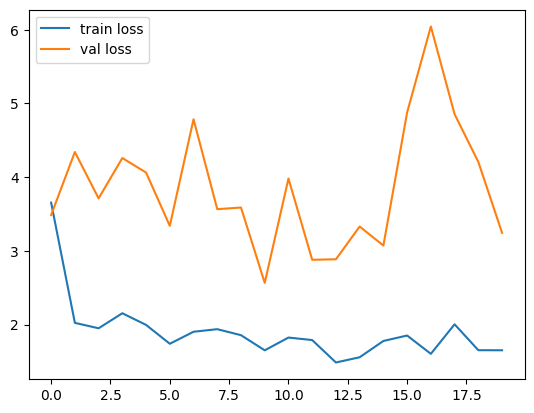

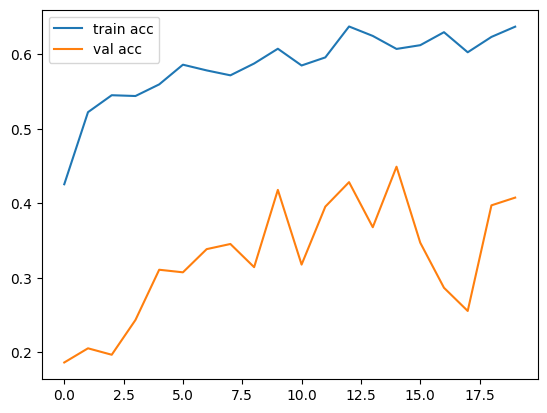

<Figure size 640x480 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Colab Notebooks/Trained/Carrot_Dieseas/Resnet 50/model_c_resnet_50.h5')

In [19]:
y_pred = model.predict(test_set)

19/19 [==============================] - 77s 4s/step


In [20]:
y_pred

array([[1.0688191e-05, 2.1154367e-05, 3.9733117e-05, ..., 1.4786244e-06,
        1.5855444e-06, 9.7684437e-01],
       [5.2098370e-01, 2.2044703e-06, 4.2006347e-01, ..., 7.7396244e-08,
        2.6704716e-02, 2.7981467e-04],
       [4.4521785e-04, 4.6075126e-03, 9.8959154e-01, ..., 1.2386383e-06,
        4.4408563e-04, 2.1065088e-04],
       ...,
       [1.5303254e-07, 1.2522450e-11, 9.7483790e-09, ..., 3.2407064e-07,
        6.2927225e-04, 9.9907947e-01],
       [5.9816980e-01, 8.4605854e-05, 1.7917946e-02, ..., 8.6194535e-07,
        2.9547336e-02, 3.3937773e-01],
       [8.4471720e-04, 1.7121159e-04, 6.4130002e-03, ..., 6.1309569e-05,
        3.6144269e-05, 1.0850161e-01]], dtype=float32)

In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [22]:
model=load_model('/content/drive/MyDrive/Colab Notebooks/Trained/Carrot_Dieseas/Resnet 50/model_c_resnet_50.h5')

In [24]:
img=image.load_img('/content/drive/MyDrive/Colab Notebooks/Dataset/Test/Black Root Rot/10blackroot rot.PNG',target_size=(224,224))

In [35]:
img_data

array([[[[-103.26842 , -116.10841 , -123.01726 ],
         [-103.26842 , -116.10841 , -123.01726 ],
         [-103.264496, -116.10057 , -123.009415],
         ...,
         [-103.06449 , -115.8888  , -122.81725 ],
         [-102.939   , -115.779   , -122.68    ],
         [-102.939   , -115.779   , -122.68    ]],

        [[-103.26842 , -116.10841 , -123.01726 ],
         [-103.26842 , -116.10841 , -123.01726 ],
         [-103.264496, -116.10057 , -123.009415],
         ...,
         [-103.06449 , -115.8888  , -122.81725 ],
         [-102.939   , -115.779   , -122.68    ],
         [-102.939   , -115.779   , -122.68    ]],

        [[-103.28018 , -116.12018 , -123.0251  ],
         [-103.28018 , -116.12018 , -123.0251  ],
         [-103.26842 , -116.10449 , -123.01726 ],
         ...,
         [-103.0841  , -115.90449 , -122.825096],
         [-102.939   , -115.779   , -122.68    ],
         [-102.939   , -115.779   , -122.68    ]],

        ...,

        [[-102.939   , -115.779   , -1

In [25]:
x=image.img_to_array(img)
x

array([[[169., 171., 171.],
        [169., 171., 171.],
        [171., 173., 172.],
        ...,
        [220., 227., 223.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[169., 171., 171.],
        [169., 171., 171.],
        [171., 173., 172.],
        ...,
        [220., 227., 223.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[167., 168., 168.],
        [167., 168., 168.],
        [169., 172., 171.],
        ...,
        [218., 223., 218.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [26]:
x=x/255

In [27]:
x.shape

(224, 224, 3)

In [28]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [29]:
model.predict(img_data)

1/1 [==============================] - 2s 2s/step


array([[4.8658171e-11, 3.0253376e-22, 2.2614728e-19, 1.3330637e-07,
        5.1408957e-11, 5.5557495e-04, 3.0547616e-09, 9.9941385e-01,
        3.0536812e-05, 5.1297464e-16, 1.0493643e-15, 3.2285836e-12,
        3.1187561e-13]], dtype=float32)

In [30]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 23ms/step


In [31]:
a==1

array([False])

In [32]:
import tensorflow as tf

In [33]:
tf.__version__

'2.12.0'

In [36]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Trained/Carrot_Dieseas/Resnet 50/model_c_resnet_50.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

99178816